## Data Preparation

### Rename column names
Let's convert all column names to lowercase for easier data manipulation.

### Convert data types
1. **Year_of_Release:** We will convert this column to datetime data type to properly work with the release years of games.
2. **Critic_Score:** Convert to float data type to analyze critic scores accurately.
3. **User_Score:** Similarly to Critic_Score, we will convert this column to float data type.
4. **Rating:** We will leave it as a string data type since it is a categorical variable.

### Handling missing values
1. We will fill missing values in the Critic_Score and User_Score columns with median values to maintain data integrity without affecting the analysis.
2. Missing values could have occurred due to data unavailability, extraction errors, or incomplete information.
3. For the 'tbd' abbreviation in the User_Score column (to be determined), we can replace it with NaN and then fill missing values with median values.

### Calculating total sales
Add a column Total_sales where we will sum up the sales of games in all regions.

## Exploratory Data Analysis

### Number of games released per year
Examine how the number of games released varied over the years to determine the significance of data from all periods.

### Sales by platforms
Plot the distribution of sales by platforms and identify platforms with the highest total sales. Determine the average lifespan of a platform, the emergence of new platforms, and the disappearance of old ones.

### Selecting the relevant period for analysis
Choose the relevant period for analysis based on the previous data exploration. Older data will not be considered.

### Sales by platforms
Identify the leading platforms in sales, their growth or decline trends, and select potentially profitable platforms.

### Box plot for global sales
Construct a box plot for global game sales by platforms to assess data dispersion and outliers.

### Impact of reviews on sales
Examine the correlation between user and critic reviews and sales on a popular platform. Compare the findings with other platforms.

### Genre distribution
Analyze the overall distribution of games by genre and identify the most profitable genres, as well as genres with low sales.

## Regional User Profile

### Platforms and genres
Determine the most popular platforms and genres in the regions NA, EU, JP, and compare their sales shares.

### Influence of ESRB rating
Study the influence of ESRB rating on sales in each region.

## Hypothesis Testing

### Hypotheses
1. The average user ratings of Xbox One and PC platforms are equal.
2. The average user ratings of Action and Sports genres are different.

### Alpha threshold
Set the alpha threshold and describe the formulated null and alternative hypotheses.

### Hypothesis testing criteria
Choose an appropriate criterion for hypothesis testing and justify the selection.

## Summary

In conclusion, we will summarize the key findings and recommendations for businesses based on the analysis and research conducted.

## Data Analysis Objectives

During the data analysis, we will identify patterns that determine the success of games to define a popular product and plan an advertising campaign.

## Data Preparation
Let's load the dataset so that we can work on and run the project from anywhere. Here is the code snippet:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
pd.set_option('display.max_columns', None)


In [2]:
try:
    df = pd.read_csv('C:/Users/1/Desktop/games.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')


In [3]:
display(df.head(30))


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
df.duplicated().sum() 


0

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Проверка на поиск дубликатов выполнена, молодец
        
Особенно это станет важным, когда мы перейдем к более сложным задачам на втором модуле курса
          

In [5]:
df.shape

(16715, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
df.columns = df.columns.str.lower()

In [8]:
df[df.duplicated(subset = ['name', 'platform', 'year_of_release'], keep =False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


In [9]:
df.dropna(subset=['name', 'genre', 'year_of_release'], inplace=True)

In [10]:
df[df.duplicated(subset = ['name', 'platform', 'year_of_release'], keep =False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


In [11]:
df.drop_duplicates(subset = ['name', 'platform', 'year_of_release'], keep =False,inplace=True)

In [12]:
df[df.duplicated(subset = ['name', 'platform', 'year_of_release'], keep =False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [13]:
df.isna().mean()*100

name                0.000000
platform            0.000000
year_of_release     0.000000
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.459676
user_score         40.171512
rating             40.603333
dtype: float64

In [14]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [15]:
#Name 
df[df['name'].isna()]

df.dropna(subset = ['name'],inplace = True)

In [16]:
df.isna().sum() 


name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

'% соотношение пропусков к общему кол-ву'

1.609332934489979

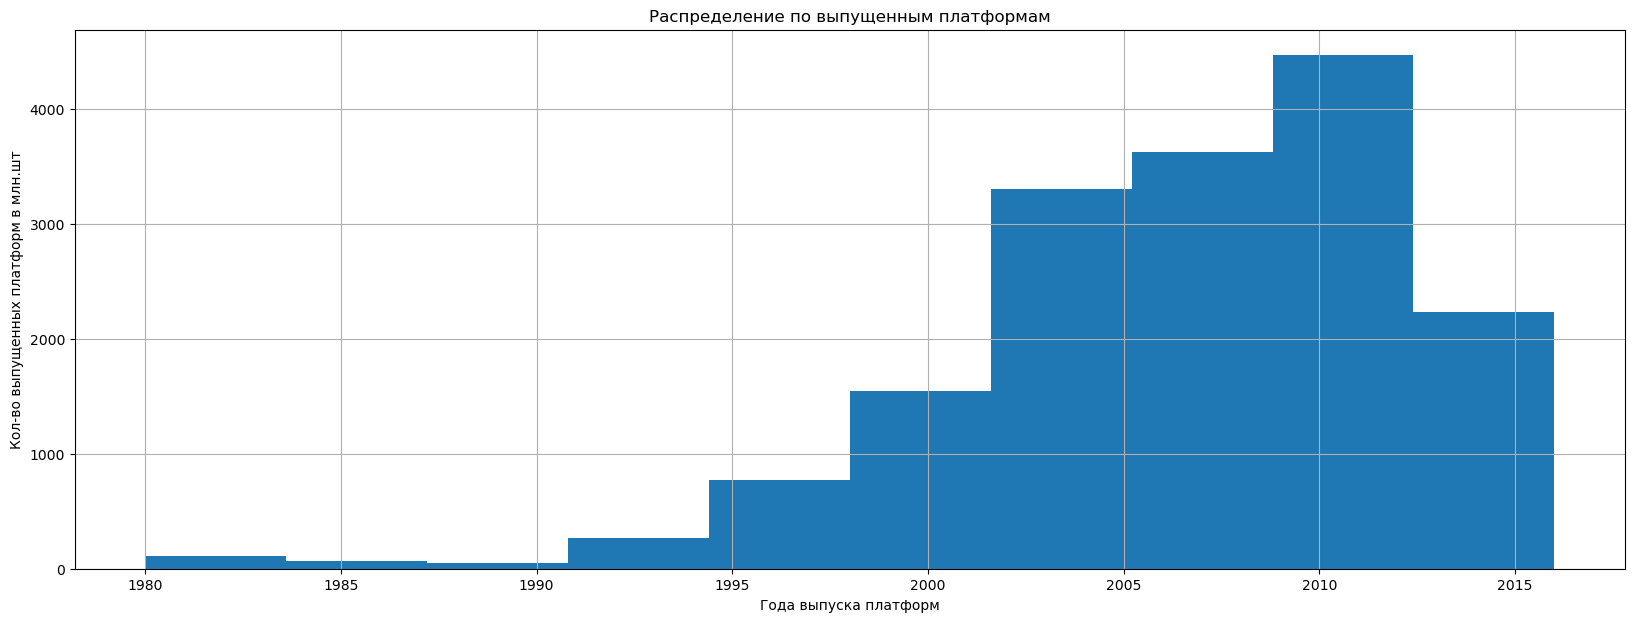

In [17]:
df['year_of_release'].plot(kind = 'hist', grid = True, figsize = (20,7), title = 'Распределение по выпущенным платформам')
plt.xlabel('Года выпуска платформ')
plt.ylabel('Кол-во выпущенных платформ в млн.шт')
display('% соотношение пропусков к общему кол-ву',(269/16715)*100)
# 1.6% не много, да и данные распределены нормально, но считаю, что необходимо дальнейшее изучение пропусков даного столбца

**Вывод** \
До 1996 года игр выпускалось очень мало \
с развитием игровых платформ увеличивались и продажи игр для них \
пик был  до 2010 г и потом рынок пошел на спад \
предполагаю, что связано это с сильным развитием мобильных игровых платорм 

In [18]:
df[df['year_of_release'].isna()].tail(30)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [19]:
# в теории год релиза в пропусках можно заменить на год релиза той-же игры выпускаемой под другие платформы
df['year_of_release'].isna().sum()
#df['year_of_release'] = df['year_of_release'].fillna(-1).astype(int)
#проверим изменения
#df.info()
# все ок, проверим целочисленность
#df['year_of_release']
# и тут все ок

0

In [20]:
tt = df[df['year_of_release'].isna()].sort_values(by = 'platform')
display(tt.groupby('platform')['name','critic_score','user_score'].count().sort_values(by = 'platform',ascending = False))


/var/folders/ks/t07j0hlj1_96rl9nvc94kcbr0000gn/T/ipykernel_42616/2169611925.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  display(tt.groupby('platform')['name','critic_score','user_score'].count().sort_values(by = 'platform',ascending = False))


,name,critic_score,user_score
platform,,,


In [21]:
# check
# жизненный срок платформы

years_of_life = df.pivot_table(index='platform',values='year_of_release',aggfunc=['min','max'])
years_of_life.columns=['min','max']
years_of_life['years_of_life']=years_of_life['max']-years_of_life['min']
years_of_life

years_of_life.sort_values(by = 'max', ascending = False)

,min,max,years_of_life
platform,,,
XOne,2013.0,2016.0,3.0
3DS,2011.0,2016.0,5.0
X360,2005.0,2016.0,11.0
WiiU,2012.0,2016.0,4.0
Wii,2006.0,2016.0,10.0
PSV,2011.0,2016.0,5.0
PC,1985.0,2016.0,31.0
PS4,2013.0,2016.0,3.0
PS3,2006.0,2016.0,10.0


In [22]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [23]:
df.dropna(subset = ['year_of_release'], inplace = True)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [24]:
df['year_of_release'].isna().sum()


0

In [25]:
years_of_life = df.pivot_table(index='platform',values='year_of_release',aggfunc=['min','max'])
years_of_life.columns=['min','max']
years_of_life['years_of_life']=years_of_life['max']-years_of_life['min']
years_of_life

,min,max,years_of_life
platform,,,
2600,1980.0,1989.0,9.0
3DO,1994.0,1995.0,1.0
3DS,2011.0,2016.0,5.0
DC,1998.0,2008.0,10.0
DS,1985.0,2013.0,28.0
GB,1988.0,2001.0,13.0
GBA,2000.0,2007.0,7.0
GC,2001.0,2007.0,6.0
GEN,1990.0,1994.0,4.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16442 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16442 non-null  object 
 1   platform         16442 non-null  object 
 2   year_of_release  16442 non-null  float64
 3   genre            16442 non-null  object 
 4   na_sales         16442 non-null  float64
 5   eu_sales         16442 non-null  float64
 6   jp_sales         16442 non-null  float64
 7   other_sales      16442 non-null  float64
 8   critic_score     7981 non-null   float64
 9   user_score       9837 non-null   object 
 10  rating           9766 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


#### in critic_score > 40% nulls
look

In [27]:
df[df['critic_score'].isna()].head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


In [28]:
df['user_score'].isna().sum()

6605

By looking at the first 15 rows of the table, we can see that there are missing values across different platforms, years, and genres. Filling these missing values based on "similarity" is not possible as it may distort the actual rating picture. Anticipating ahead, according to the terms of reference (TZ), a part of the data will be filtered out, and along with them, a part of the missing values will be filtered out as well. Therefore, we will leave the missing values as they are.

Skipping one column, let's change the data type in the user_score column. However, we cannot do this immediately as the column contains the value tbd. Let's find out what it means by creating a query on the internet. The link https://mobilradio.ru/information/vocabulary/tbd.htm states that TBD is an abbreviation for the English phrases To Be Determined or To Be Decided. It seems that at the time of data entry into the database, it was impossible to determine the rating, which means that for us, tbd = NaN.

In [29]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = 'NaN'
df['user_score'] = df['user_score'].astype(float)
# проверим наличие изменение типа данных


In [30]:
df['user_score'].isna().sum()

8981

In [31]:
display(df[df['user_score'] == 'tbd'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [32]:
display(df['user_score'])

0        8.0
1        NaN
2        8.3
3        8.0
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16442, dtype: float64

In [33]:
# проверим наличие 'tbd'
display(df.loc[df['user_score'] == 'NaN'])
# их нет, чего мы и добились

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


## Calculate total sales in all regions and store them in a separate column. 
We need to sum all values (.sum) of the columns
na_sales \
eu_sales \
jp_sales \
other_sales \
we will write them to a column named all_sales

In [34]:
df['all_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis = 1)  
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


### More than 40% of data is missing in the rating

In [35]:
df[df['rating'].isna()].head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN,23.09
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN,20.62
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN,18.24
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN,18.14
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN,17.28


#### Missing data is scattered across different genres, years, and platforms. 
#### The rating is calculated based on user ratings and critic reviews, which were not touched so we will not alter them here to avoid distortion.

In [36]:
# check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16442 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16442 non-null  object 
 1   platform         16442 non-null  object 
 2   year_of_release  16442 non-null  float64
 3   genre            16442 non-null  object 
 4   na_sales         16442 non-null  float64
 5   eu_sales         16442 non-null  float64
 6   jp_sales         16442 non-null  float64
 7   other_sales      16442 non-null  float64
 8   critic_score     7981 non-null   float64
 9   user_score       7461 non-null   float64
 10  rating           9766 non-null   object 
 11  all_sales        16442 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.6+ MB


In [37]:
df['rating'] = df['rating'].fillna('UNKNOWN')
df[df['rating'] == 'UNKNOWN']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,UNKNOWN,40.24
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,UNKNOWN,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,UNKNOWN,30.26
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,UNKNOWN,28.31
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,UNKNOWN,24.67
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,UNKNOWN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,UNKNOWN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,UNKNOWN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,UNKNOWN,0.01


## Exploratory Data Analysis:

1. Let's look at how many games were released in different years and determine the relevant period for analysis. Data from all periods are important to understand the overall industry dynamics.

2. Analyze changes in sales by platform, identify platforms with the highest total sales, and plot the distribution by years. Determine the typical lifespan of platforms.

3. Select data for the relevant period, excluding previous years, to make a forecast for 2017.

4. Identify the leading platforms by sales and those on the decline, choose potentially profitable ones.

5. Create a "box plot" of global game sales by platform and draw conclusions.

6. Study the impact of user and critic reviews on sales within a popular platform, create a scatter plot and calculate the correlation between reviews and sales.

7. Compare the findings with game sales on other platforms.

8. Examine the overall distribution of games by genre, identify the most profitable genres, and highlight genres with high and low sales.


<Axes: >

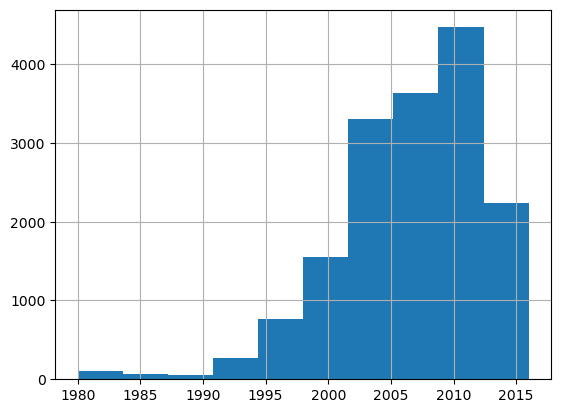

In [38]:
df.loc[df['year_of_release'] >= 0,'year_of_release'].hist()

Text(0, 0.5, 'Кол-во выпущенных платформ в млн.шт')

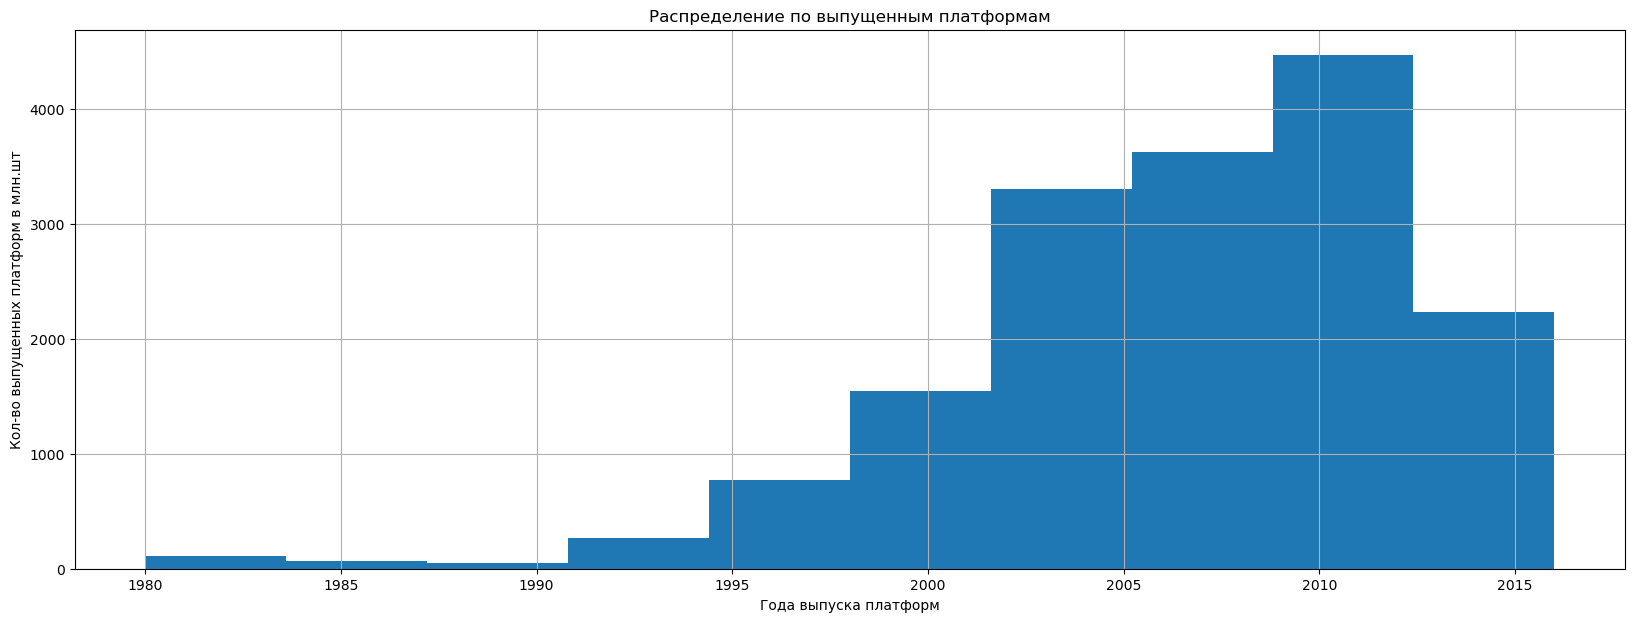

In [39]:
df['year_of_release'].plot(kind = 'hist', grid = True, figsize = (20,7), title = 'Распределение по выпущенным платформам')
plt.xlabel('Года выпуска платформ')
plt.ylabel('Кол-во выпущенных платформ в млн.шт')

## Conclusion:

Until 1991, not many games were released.

The development of gaming platforms gave a boost to game development for them.

The peak of sales was in 2010, followed by a significant decline.

I assume that this is related to the development of mobile phones, mobile gaming platforms, and the cautious investment in this direction.

## Look at how sales have changed by platform.
Choose platforms with the highest total sales and plot the distribution by year.
What is the typical timeframe for new platforms to appear and old ones to disappear?

To analyze changes in sales by platform and determine the typical timeframe for the appearance of new platforms and the disappearance of old ones, the following steps need to be taken:

1. Examine the data on game sales by different platforms over the years.
2. Identify platforms with the highest total sales.
3. Plot the distribution of sales for these platforms by year.
4. Analyze how quickly new platforms appear and old ones disappear.


In [40]:
platform_sales = pd.pivot_table(df, index=['platform'], values=['all_sales'], aggfunc='sum')
platform_sales = platform_sales.sort_values('all_sales',ascending = False)
platform_sales

,all_sales
platform,
PS2,1233.56
X360,961.24
PS3,928.77
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [41]:
platform_sales_top = list(platform_sales.index[:6])
platform_sales_top

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

In [42]:
platform_sales_top = pd.pivot_table(df.query("platform == ['PS2', 'X360', 'PS3', 'Wii', 'PS', 'DS', 'PS4', 'PSP', 'GBA', 'GB']"), \
                                    index=['platform','year_of_release'], values='all_sales', aggfunc='sum')
display(platform_sales_top)
display()



all_sales
platform year_of_release           
DS       1985.0                0.02
         2004.0               17.27
         2005.0              130.14
         2006.0              119.81
         2007.0              146.94
...                             ...
X360     2012.0               99.74
         2013.0               88.58
         2014.0               34.74
         2015.0               11.96
         2016.0                1.52

[104 rows x 1 columns]

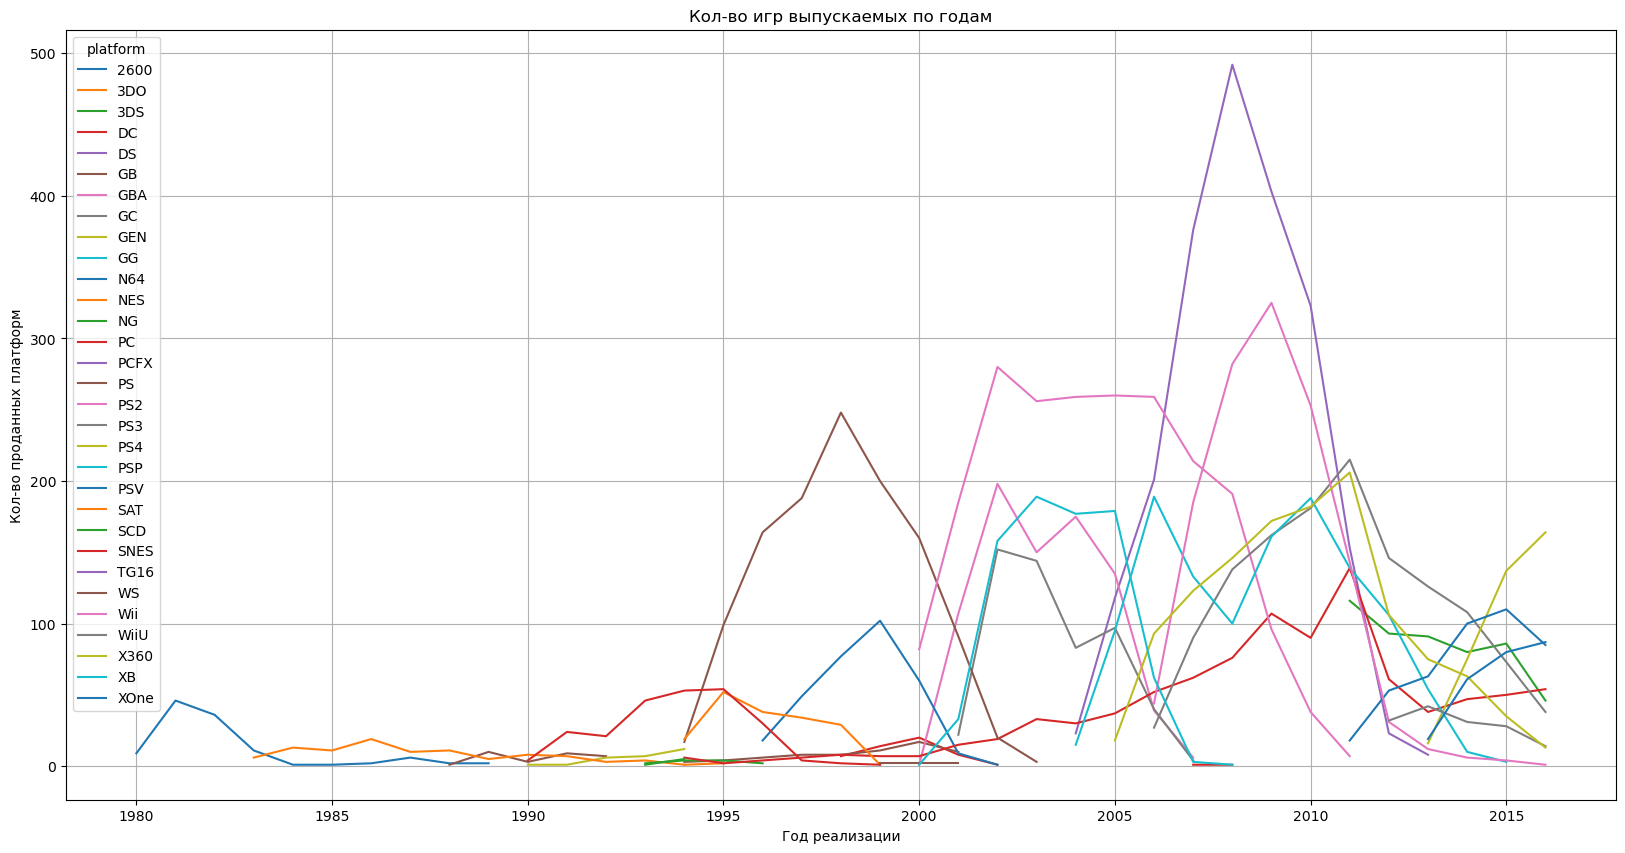

In [43]:
realese_per_year = df.pivot_table(index='year_of_release', columns = 'platform', values='all_sales', aggfunc='count').plot(grid=True, figsize=(20,10), title = 'Кол-во игр выпускаемых по годам')
plt.xlabel('Год реализации')
plt.ylabel('Кол-во проданных платформ')
plt.show()

#### Average platform lifespan is 5-10 years.

#### Therefore, data for all periods is not needed.
#### The relevance of many games has also expired.



In [44]:
max_sum_sales = df.groupby(['platform','year_of_release'])['all_sales']\
.agg('sum') \
#.head(103) \
#.sort_values(ascending = True)
max_sum_sales

platform  year_of_release
2600      1980.0             11.38
          1981.0             35.68
          1982.0             28.88
          1983.0              5.84
          1984.0              0.27
                             ...  
XB        2008.0              0.18
XOne      2013.0             18.96
          2014.0             54.07
          2015.0             60.14
          2016.0             26.15
Name: all_sales, Length: 238, dtype: float64

In [45]:
act_period = df.groupby('year_of_release')['platform'].count()
display(act_period)

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     651
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: platform, dtype: int64

In [46]:
#df['year_of_release'] = df['year_of_release'].astype(int)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16442 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16442 non-null  object 
 1   platform         16442 non-null  object 
 2   year_of_release  16442 non-null  float64
 3   genre            16442 non-null  object 
 4   na_sales         16442 non-null  float64
 5   eu_sales         16442 non-null  float64
 6   jp_sales         16442 non-null  float64
 7   other_sales      16442 non-null  float64
 8   critic_score     7981 non-null   float64
 9   user_score       7461 non-null   float64
 10  rating           16442 non-null  object 
 11  all_sales        16442 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.6+ MB


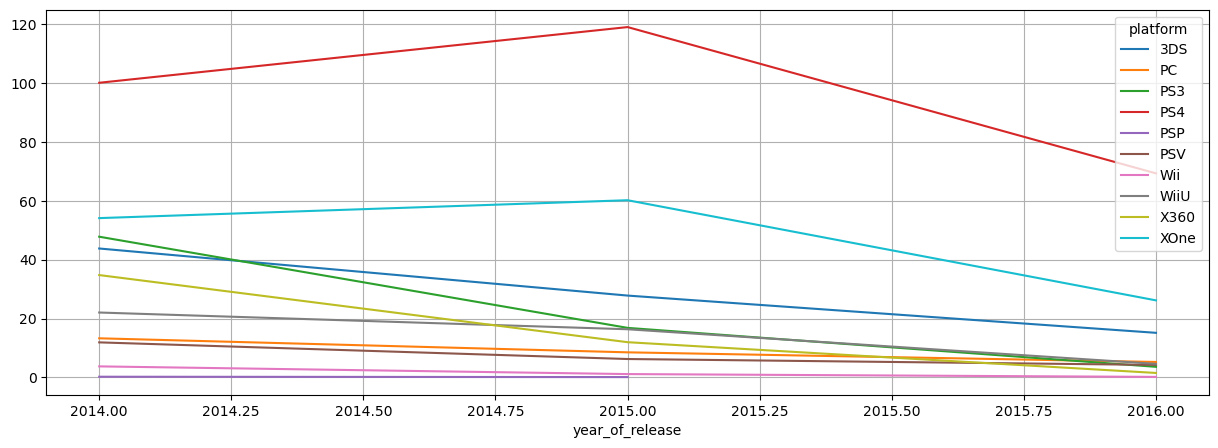

In [47]:
df = df.query("2014 <= year_of_release <= 2016")
df.pivot_table(index='year_of_release', columns = 'platform', values='all_sales', aggfunc='sum').plot(grid=True, figsize=(15, 5))
plt.show()

#### During the period from 2012 to 2016, many outdated platforms were phased out.
#### We have three clear leaders whose sales have declined but have not gone close to zero: PS4, XOne, 3DS (to a lesser extent).
#### PC has been and will continue to live on for a long time, apparently.


#### Sales for all gaming platforms were declining, and based on the sales chart, game sales for all platforms were close to the 0 mark.
#### Only two platforms can boast high sales: PS4 and XOne.


Now let's determine the profitable platform by taking a slice from 2014 onwards for the platforms 'XOne', 'PS4', '3DS', and 'PC'. We can analyze the data on game sales on these platforms and determine which one has been the most successful from 2014 to the present.



In [48]:
five_platforms = df.query("year_of_release >= 2014 and platform == ['XOne','PS4','3DS','PC']")
#two_platforms[two_platforms['year_of_release'] == 2013]
five_platforms

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,UNKNOWN,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,UNKNOWN,11.68
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,UNKNOWN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16660,Prison Architect,XOne,2016.0,Action,0.01,0.00,0.00,0.00,74.0,6.7,UNKNOWN,0.01
16668,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,UNKNOWN,0.01
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016.0,Action,0.01,0.00,0.00,0.00,NaN,NaN,M,0.01
16677,Aikatsu Stars! My Special Appeal,3DS,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,UNKNOWN,0.01


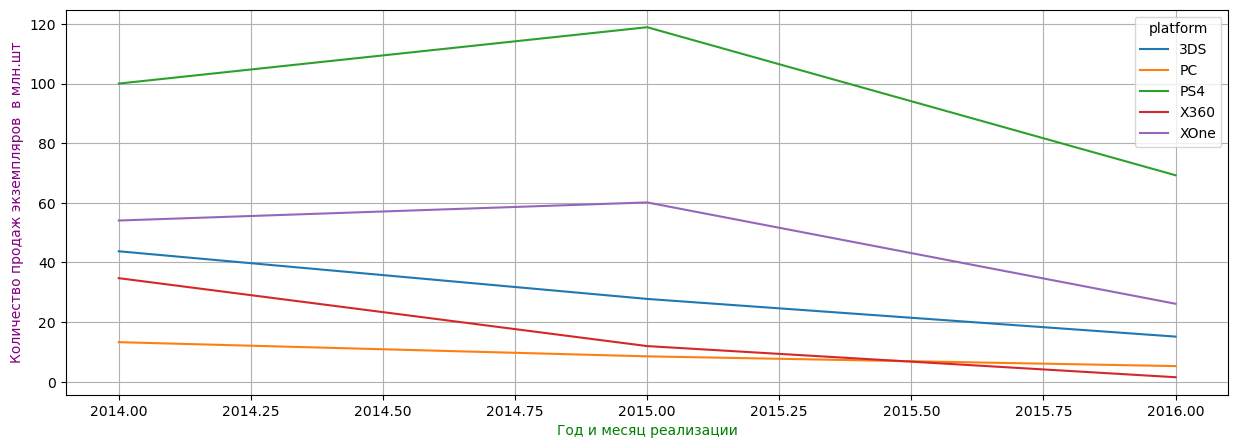

In [49]:
five_platforms = df.query("platform == ['XOne','PS4','3DS','PC','X360']")
five_platforms.pivot_table(index='year_of_release', columns = 'platform', values='all_sales', aggfunc='sum') \
.plot(grid=True, figsize=(15, 5)) 
plt.xlabel('Год и месяц реализации', color = 'green')
plt.ylabel('Количество продаж экземпляров  в млн.шт', color = 'purple')
plt.show()
#df.info()

#### Conclusion:
The world leader in sales is PS4, while XboxOne also has sales, but significantly lags behind Sony. However, both platforms are experiencing a decline in sales. By 2016, Xbox 360 had almost zero sales.

#### Let's build a box plot.


(0.0, 1.0)

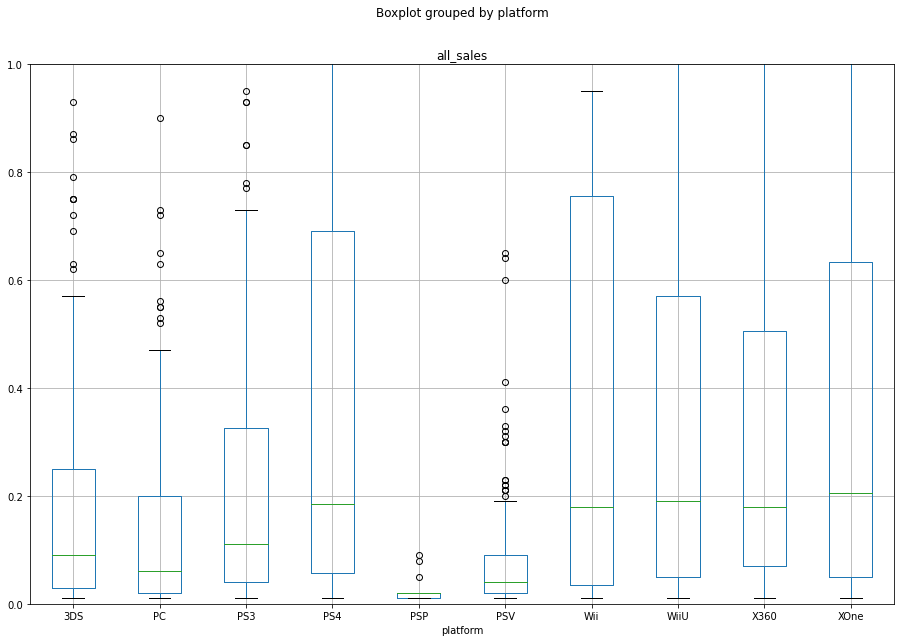

In [52]:
df.boxplot(column = 'all_sales' ,by = 'platform', figsize = (15,10) ).set_ylim(0, 1)


We see outliers in all platforms. I believe we need to test the hypothesis that these are maximum sales.У всех платформ мы видим выбросы \
считаю, что нужно проверить предположеие , что это максимальные продажи

In [50]:
df[df['platform'] == 'PS4'].sort_values('all_sales',ascending = False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,UNKNOWN,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,UNKNOWN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
15943,Professional Farmer 2016,PS4,2015.0,Action,0.00,0.01,0.00,0.00,NaN,NaN,UNKNOWN,0.01
15864,Rocksmith 2014 Edition Remastered,PS4,2016.0,Misc,0.01,0.00,0.00,0.00,NaN,7.8,T,0.01
15839,Mark McMorris Infinite Air,PS4,2016.0,Sports,0.01,0.00,0.00,0.00,49.0,6.0,T,0.01
15790,This War of Mine,PS4,2016.0,Action,0.00,0.01,0.00,0.00,NaN,NaN,UNKNOWN,0.01


In [51]:
df[df['platform'] == 'XOne'].sort_values('all_sales',ascending = False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
99,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,UNKNOWN,7.39
165,Grand Theft Auto V,XOne,2014.0,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014.0,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015.0,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015.0,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
...,...,...,...,...,...,...,...,...,...,...,...,...
16066,Assetto Corsa,XOne,2016.0,Racing,0.00,0.01,0.00,0.00,63.0,6.7,E,0.01
16035,Pac-Man Championship Edition 2 + Arcade Game S...,XOne,2016.0,Action,0.01,0.00,0.00,0.00,NaN,NaN,UNKNOWN,0.01
16015,Mark McMorris Infinite Air,XOne,2016.0,Sports,0.01,0.00,0.00,0.00,NaN,7.1,T,0.01
16013,Dead Rising 2,XOne,2016.0,Action,0.01,0.00,0.00,0.00,NaN,NaN,M,0.01


In [52]:
df[df['platform'] == 'X360'].sort_values('all_sales',ascending = False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
263,Call of Duty: Advanced Warfare,X360,2014.0,Shooter,2.77,1.11,0.0,0.40,NaN,4.9,M,4.28
494,FIFA 15,X360,2014.0,Sports,0.79,1.92,0.0,0.21,NaN,4.2,E,2.92
829,Madden NFL 15,X360,2014.0,Sports,1.77,0.06,0.0,0.22,NaN,5.5,E,2.05
898,Destiny,X360,2014.0,Shooter,1.31,0.43,0.0,0.18,NaN,4.7,T,1.92
1049,Call of Duty: Black Ops 3,X360,2015.0,Shooter,1.14,0.40,0.0,0.16,NaN,NaN,UNKNOWN,1.70
...,...,...,...,...,...,...,...,...,...,...,...,...
15142,Rugby Challenge 3,X360,2016.0,Sports,0.00,0.02,0.0,0.00,NaN,NaN,E,0.02
15376,Back to the Future: The Game,X360,2015.0,Adventure,0.02,0.00,0.0,0.00,NaN,7.5,UNKNOWN,0.02
15578,Kung Fu Panda: Showdown of Legendary Legends,X360,2015.0,Action,0.00,0.02,0.0,0.00,NaN,6.8,E10+,0.02
16294,Adventure Time: The Secret of the Nameless,X360,2014.0,Adventure,0.01,0.00,0.0,0.00,NaN,NaN,UNKNOWN,0.01


#### Conclusion: 
Indeed, these are data points with large sales. I believe that there is no need to remove them.

#### Let's assess the impact of user and critic reviews on sales for a popular platform, including PS4. We will need userscore and criticscore for this analysis.

Text(0.5, 0, 'Оценка пользователя')

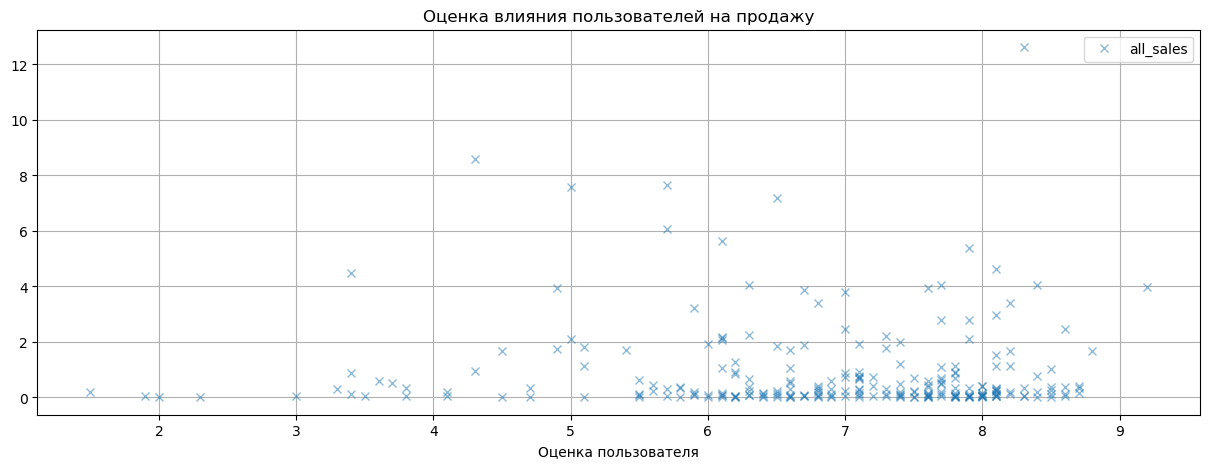

In [53]:
df[df['platform'] == 'PS4'] \
.plot(x= 'user_score', y = 'all_sales', style = 'x',grid = True, figsize = (15,5 ), alpha = 0.5, title = 'Оценка влияния пользователей на продажу')
plt.xlabel('Оценка пользователя')

Text(0.5, 0, 'Оценка критиков ')

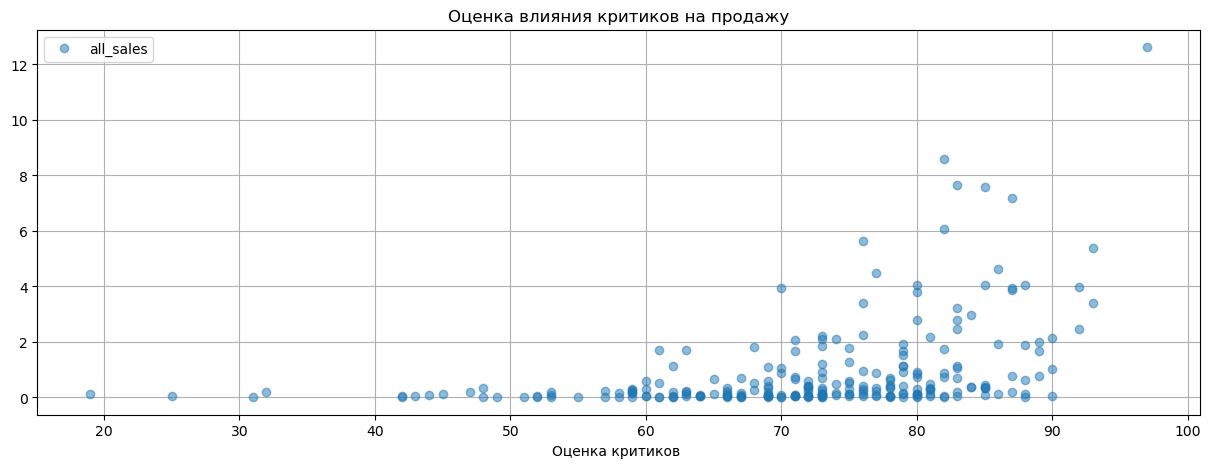

In [54]:
# Аналогично сделаем для critic_score
df[df['platform'] == 'PS4'] \
.plot(x= 'critic_score', y = 'all_sales', style = 'o',grid = True, figsize = (15,5 ), alpha = 0.5, title = 'Оценка влияния критиков на продажу')
plt.xlabel('Оценка критиков ')

Text(0.5, 0, 'Оценка пользователя')

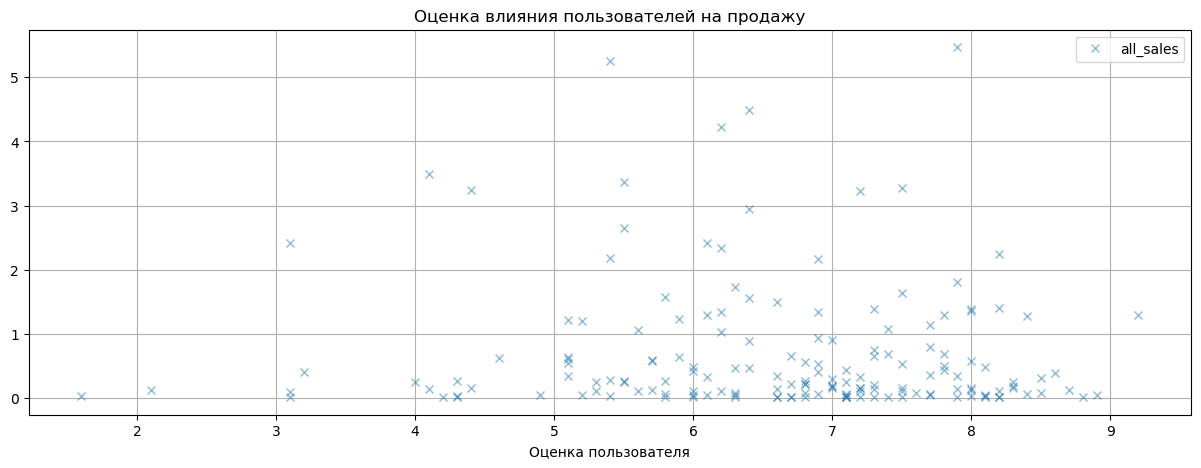

In [55]:
df[df['platform'] == 'XOne'] \
.plot(x= 'user_score', y = 'all_sales', style = 'x',grid = True, figsize = (15,5 ), alpha = 0.5, title = 'Оценка влияния пользователей на продажу')
plt.xlabel('Оценка пользователя')

Text(0.5, 0, 'Оценка критиков ')

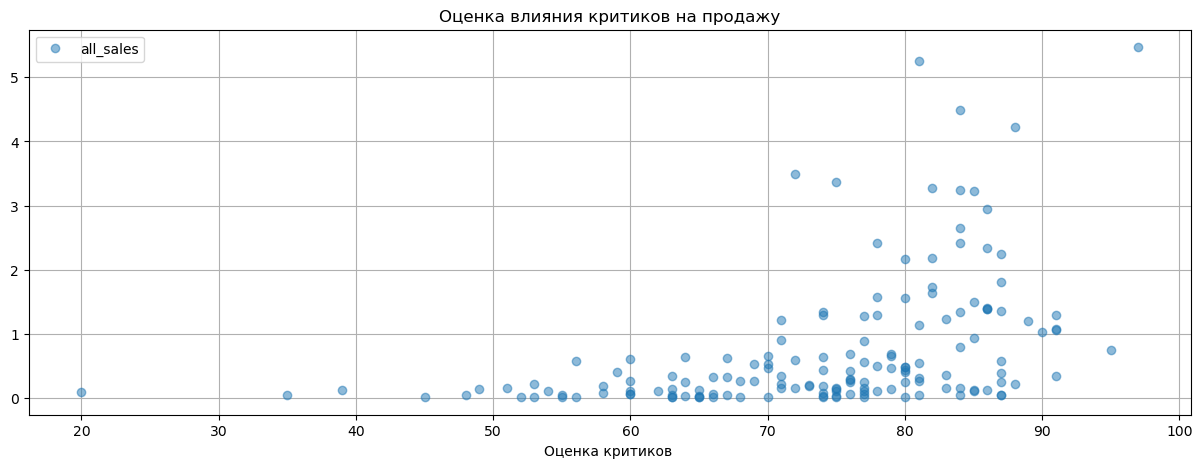

In [56]:
df[df['platform'] == 'XOne'] \
.plot(x= 'critic_score', y = 'all_sales', style = 'o',grid = True, figsize = (15,5 ), alpha = 0.5, title = 'Оценка влияния критиков на продажу')
plt.xlabel('Оценка критиков ')

Text(0.5, 0, 'Оценка критиков ')

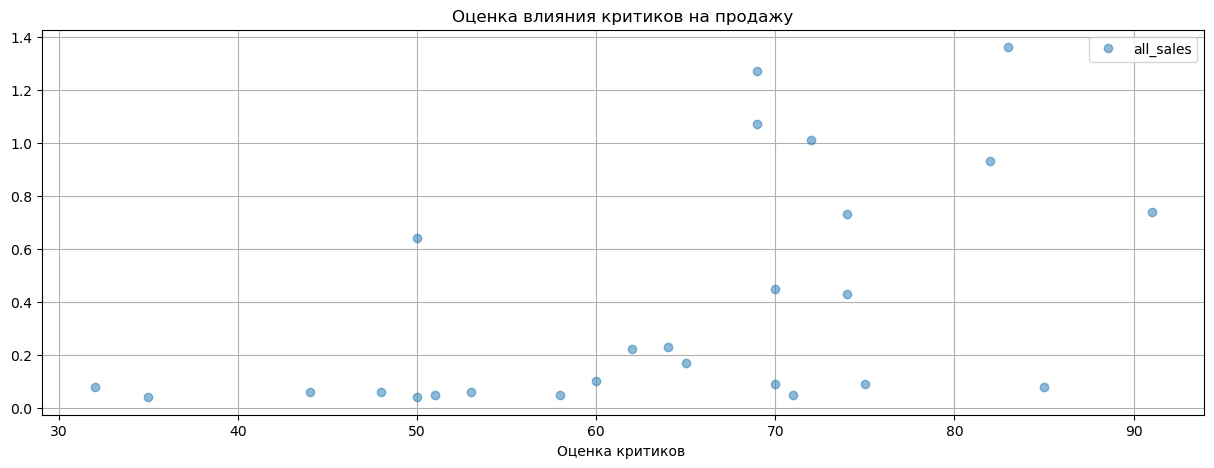

In [57]:
df[df['platform'] == 'X360'] \
.plot(x= 'critic_score', y = 'all_sales', style = 'o',grid = True, figsize = (15,5 ), alpha = 0.5, title = 'Оценка влияния критиков на продажу')
plt.xlabel('Оценка критиков ')

Text(0.5, 0, 'Оценка пользователей')

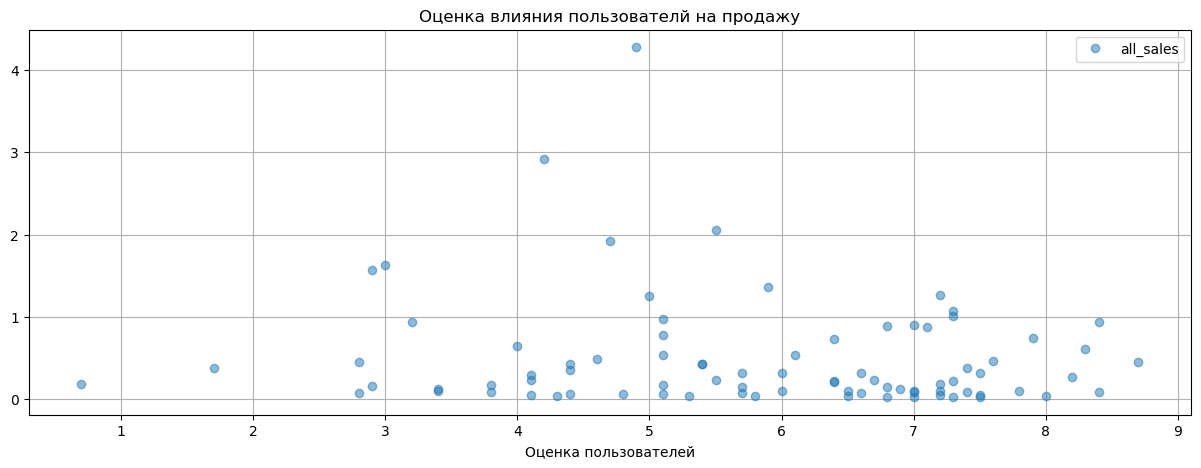

In [58]:
df[df['platform'] == 'X360'] \
.plot(x= 'user_score', y = 'all_sales', style = 'o',grid = True, figsize = (15,5 ), alpha = 0.5, title = 'Оценка влияния пользователй на продажу')
plt.xlabel('Оценка пользователей')

Text(0.5, 0, 'Оценка критиков ')

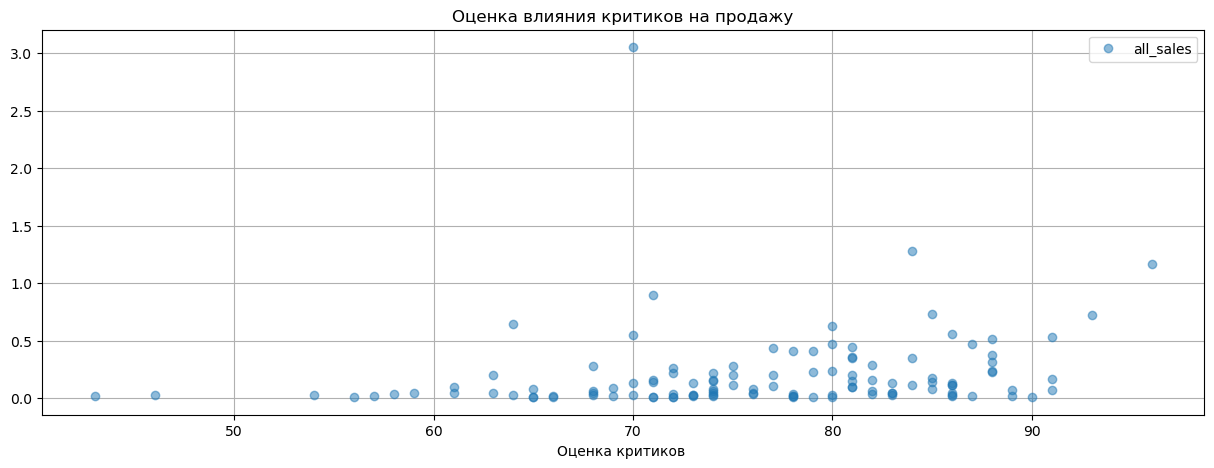

In [59]:
df[df['platform'] == 'PC'] \
.plot(x= 'critic_score', y = 'all_sales', style = 'o',grid = True, figsize = (15,5 ), alpha = 0.5, title = 'Оценка влияния критиков на продажу')
plt.xlabel('Оценка критиков ')

Text(0.5, 0, 'Оценка пользователй ')

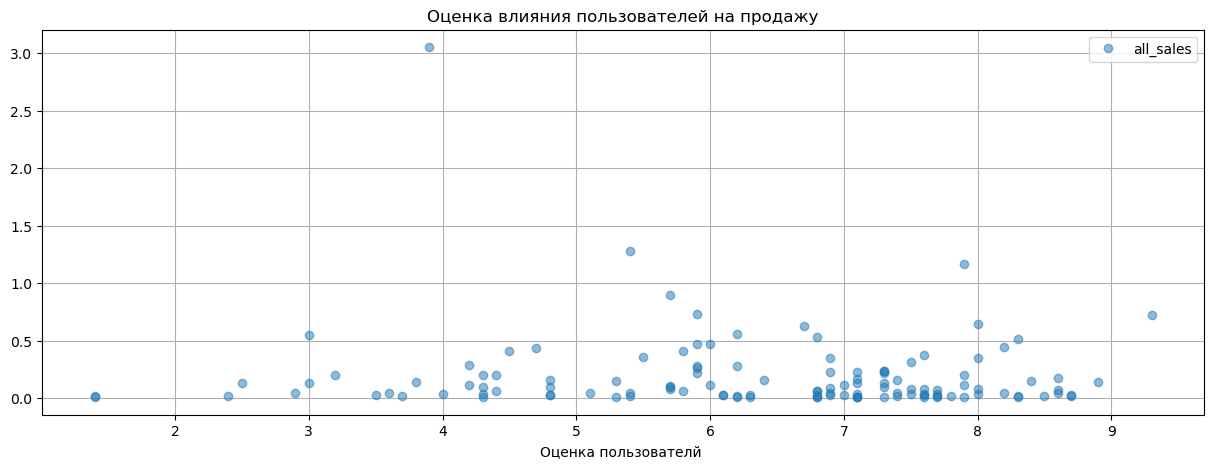

In [60]:
df[df['platform'] == 'PC'] \
.plot(x= 'user_score', y = 'all_sales', style = 'o',grid = True, figsize = (15,5 ), alpha = 0.5, title = 'Оценка влияния пользователей на продажу')
plt.xlabel('Оценка пользователй ')

In [61]:
#df[df['critic_score'] == -1]

**Let's calculate the correlation between reviews and sales**

In [65]:
data_ps4 = df[df['platform'] == 'PS4']
corr_data_ps4_us = data_ps4['user_score'].corr(data_ps4['all_sales'])
display(corr_data_ps4_us)

-0.040131589472697356

In [66]:
data_ps4_1 = df[df['platform'] == 'PS4']
corr_data_ps4_cs = data_ps4_1['critic_score'].corr(data_ps4_1['all_sales'])
display(corr_data_ps4_cs)

0.40266141068104083

In [67]:
data_xone = df[df['platform'] == 'XOne']
corr_data_xone_us = data_xone['user_score'].corr(data_xone['all_sales'])
display(corr_data_xone_us)

-0.0703839280647581

In [68]:
data_xone_1 = df[df['platform'] == 'XOne']
corr_data_xone_cs = data_xone_1['critic_score'].corr(data_xone_1['all_sales'])
display(corr_data_xone_cs)

0.42867694370333226

In [69]:
data_3ds = df[df['platform'] == '3DS']
corr_data_3ds_us = data_3ds['user_score'].corr(data_3ds['all_sales'])
display(corr_data_3ds_us)

0.2151932718527028

In [70]:
data_3ds_1 = df[df['platform'] == '3DS']
corr_data_3ds_cs = data_3ds_1['critic_score'].corr(data_3ds_1['all_sales'])
display(corr_data_3ds_cs)

0.314117492869051

In [71]:
data_pc = df[df['platform'] == 'PC']
corr_data_pc_us = data_pc['user_score'].corr(data_pc['all_sales'])
display(corr_data_pc_us)

-0.07159665703472451

In [72]:
data_pc_1 = df[df['platform'] == 'PC']
corr_data_pc_cs = data_pc_1['critic_score'].corr(data_pc_1['all_sales'])
display(corr_data_pc_cs)

0.17463413769350036

## Conclusion
In the scatter plots, we can see that overall user and critic reviews are mostly positive. The correlation between user reviews and sales is mostly absent in most cases, while the correlation between critic reviews and sales is moderate. It can be said that users rely less on user reviews than on critic reviews before making a purchase.

Chedoke Scale:

Correlation Coefficient

Weak: 0.1 — 0.3
Moderate: 0.3 — 0.5
Noticeable: 0.5 — 0.7
High: 0.7 — 0.9
Very High: 0.9 — 0.99

Text(0.5, 0, 'Оценка критиков ')

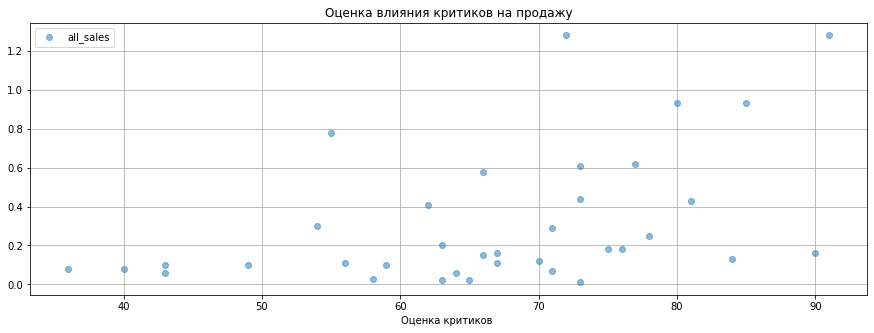

In [73]:
df[df['platform'] == 'PS3'] \
.plot(x= 'critic_score', y = 'all_sales', style = 'o',grid = True, figsize = (15,5 ), alpha = 0.5, title = 'Оценка влияния критиков на продажу')
plt.xlabel('Оценка критиков ')

Text(0.5, 0, 'Оценка пользователей ')

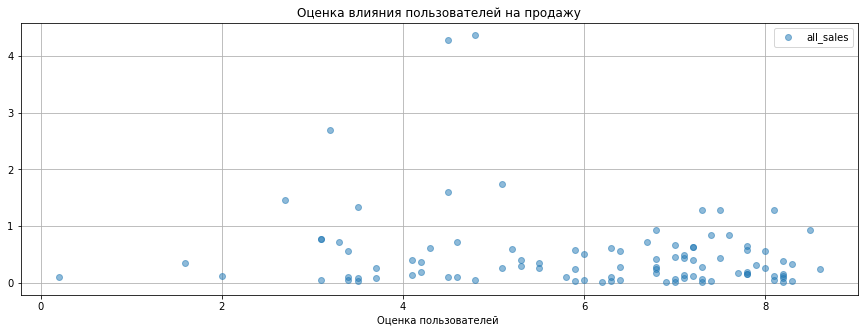

In [74]:
df[df['platform'] == 'PS3'] \
.plot(x= 'user_score', y = 'all_sales', style = 'o',grid = True, figsize = (15,5 ), alpha = 0.5, title = 'Оценка влияния пользователей на продажу')
plt.xlabel('Оценка пользователей ')

## Let's correlate the findings with sales of games on other platforms.

In [75]:
other_platforms = df.query("platform != ['XOne','PS4','3DS','PC','X360']")
other_platforms

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
110,Mario Kart 8,WiiU,2014.0,Racing,3.15,2.15,1.28,0.51,88.0,9.1,E,7.09
180,Minecraft,PS3,2014.0,Misc,2.03,2.37,0.00,0.87,NaN,NaN,UNKNOWN,5.27
216,Super Smash Bros. for Wii U and 3DS,WiiU,2014.0,Fighting,2.60,1.08,0.81,0.38,NaN,NaN,UNKNOWN,4.87
247,Splatoon,WiiU,2015.0,Shooter,1.54,1.18,1.46,0.26,81.0,8.5,E10+,4.44
255,Call of Duty: Advanced Warfare,PS3,2014.0,Shooter,1.56,1.93,0.19,0.68,NaN,4.8,M,4.36
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,UNKNOWN,0.01
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,UNKNOWN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,UNKNOWN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,UNKNOWN,0.01


In [76]:
other_platforms.groupby('platform')['all_sales'].describe().sort_values('count', ascending = False)

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
PSV,295.0,0.075932,0.141591,0.01,0.020,0.04,0.090,1.96
PS3,219.0,0.311324,0.633059,0.01,0.040,0.11,0.325,5.27
WiiU,73.0,0.588767,1.161467,0.01,0.050,0.19,0.570,7.09
PSP,13.0,0.027692,0.027735,0.01,0.010,0.02,0.020,0.09
Wii,11.0,0.460909,0.625451,0.01,0.035,0.18,0.755,2.01


In [77]:
#Построим по всем платформам ящик с усами
#other_platforms.boxplot(column = 'all_sales', by = 'platform', figsize = (20,10) )
#plt.ylim()

#plt.figure(figsize=(12,10))
#sns.boxplot(data=other_platforms, x='platform', y='all_sales')
#plt.title('Ящик с усами', fontsize=15)
#plt.xlabel('Платформа', fontsize=12)
#plt.ylabel('Глобальные продажи',fontsize=12)
#plt.ylim(0,0.98)
#plt.show()

The visualization looks much better now, and we have filtered out the outliers that we will not use.
From the given data set, I would like to highlight PS, PS2, PS3, and Xbox 360.
I am interested in the sales of Wii and DS.
- PS: a breakthrough in gaming, the first console from Sony.
- PS2: an improved version with many new features and compatibility with games from the original PS.
- PS3: the first console with Blu-ray, increased hard drive capacity, and reduced size.
- Xbox 360: a competitor to PS3 that found its own fan base. There was a long-standing battle for supremacy between Microsoft and Sony.
- Nintendo Wii: allowed for immersive gameplay with physical activity, appealing to many.
- DS: a handheld console with two screens and a memory card.
All these factors have increased the demand for gaming platforms and, consequently, for games on these platforms.

**Let's take a look at the overall distribution of games by genreм**

In [78]:
# Работать будем с общей таблицей по ней и построим график
# df.pivot_table(index='genre', values='all_sales', aggfunc='median') \
# .plot.bar(column = 'genre',grid = True, figsize = (20,8))

# b \
# .plot.bar(grid = True, figsize = (20,8))
# plt.xlabel('Название жанра')
# plt.ylabel('Кол-во продаж млн.шт')

In [79]:
df.pivot_table(index='genre', values='all_sales', aggfunc='median').sort_values(by = 'all_sales', ascending = False)

,all_sales
genre,
Shooter,0.515
Sports,0.180
Platform,0.140
Fighting,0.125
Role-Playing,0.110
Simulation,0.100
Action,0.090
Misc,0.090
Racing,0.090


In [80]:
table_genre = df.pivot_table(index='genre', values='all_sales', aggfunc='median').sort_values(by = 'all_sales', ascending = False) \
#.boxplot(column = 'all_sales', by = 'genre', figsize = (15,6)) \
#.set_ylim(0,0.28)
table_genre


,all_sales
genre,
Shooter,0.515
Sports,0.180
Platform,0.140
Fighting,0.125
Role-Playing,0.110
Simulation,0.100
Action,0.090
Misc,0.090
Racing,0.090


In [81]:
# table_genre = (other_platforms
#                .groupby('genre')['all_sales']
#                .agg('median')
#                 .sort_values(ascending=False)
#                 .index
#                )
# plt.figure(figsize=(20,15))
# sns.boxplot(data=other_platforms, x='platform', y='all_sales')
# plt.title('Ящик с усами')
# plt.xlabel('Платформа')
# ax.set_ylim(0,0.08)
 #plt.ylabel('Глобальные продажи',fontsize=12)

 #plt.show()

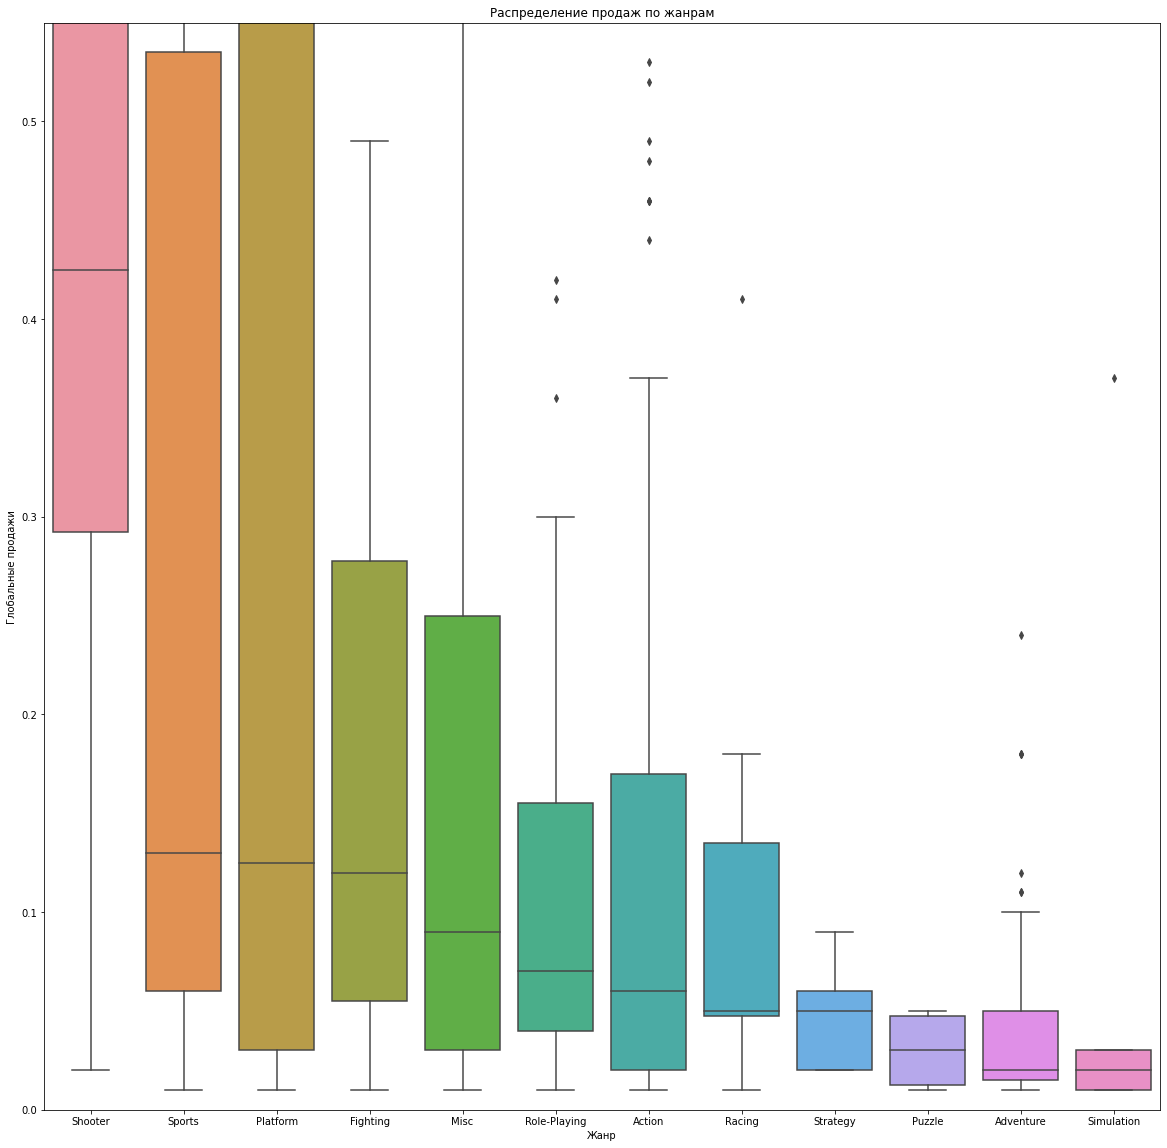

In [82]:

#other_platforms = other_platforms[other_platforms['all_sales'] < 1]
table_genre = (other_platforms
               .groupby('genre')['all_sales']
                .agg('median')
                .sort_values(ascending=False)
                .index
               )
plt.figure(figsize=(20,20))
ax = sns.boxplot(data=other_platforms, y="all_sales", x='genre', order = table_genre)
ax.set_title('Распределение продаж по жанрам')
ax.set_xlabel('Жанр')
ax.set_ylabel('Глобальные продажи')
ax.set(yscale="linear")
ax.set_ylim(0,0.55)
plt.show()



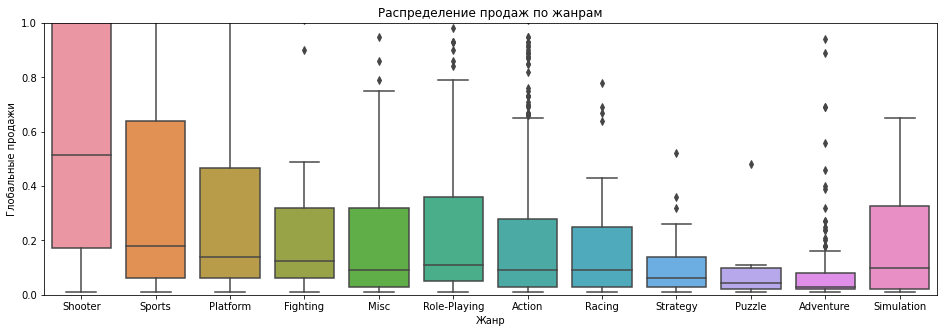

In [83]:
# check

plt.figure(figsize=(16,5))
ax = sns.boxplot(data=df, y="all_sales", x='genre', order = table_genre)
ax.set_title('Распределение продаж по жанрам')
ax.set_xlabel('Жанр')
ax.set_ylabel('Глобальные продажи')
ax.set_ylim(0,1)
plt.show()

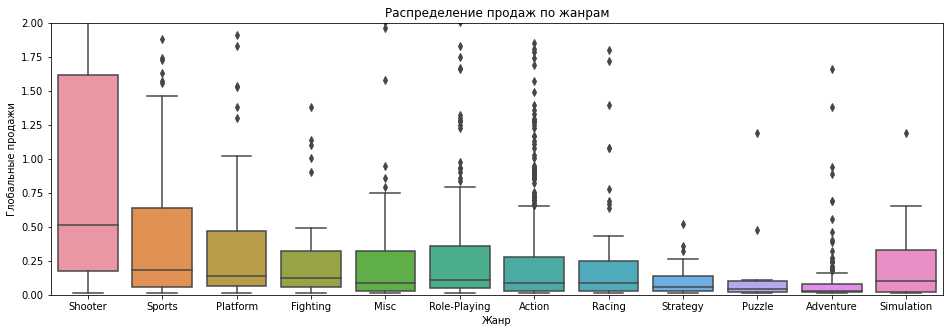

In [84]:
# check

plt.figure(figsize=(16,5))
ax = sns.boxplot(data=df, y="all_sales", x='genre', order = table_genre)
ax.set_title('Распределение продаж по жанрам')
ax.set_xlabel('Жанр')
ax.set_ylabel('Глобальные продажи')
ax.set_ylim(0, 2);

## Create a user profile for each region
Determine for each region's user (NA, EU, JP) \
The most popular platforms (top 5). Describe the differences in sales shares. \
The most popular genres (top 5). Explain the differences. \
Evaluate the impact of the ESRB rating on sales in a separate region.

## TOP -5 the most popular NA

In [62]:
#Соберем сводную таблицу и отсортируемм ее по возрастанию
df.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending = False) 


,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05
WiiU,19.36
PC,7.23
PSV,2.52
Wii,2.08


Text(0, 0.5, 'Количество продаж в млн.шт.')

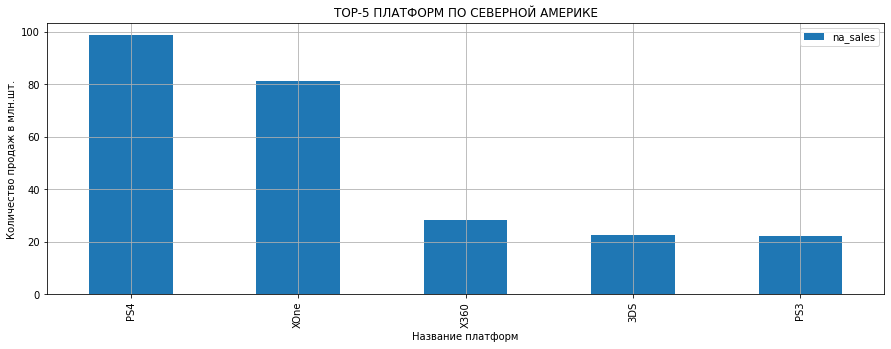

In [86]:
#Сделаем аналогично только возьмем 5 первых платформ и по ним построим график
# df.pivot_table(index='platform', values=['na_sales'], aggfunc='sum').sort_values('na_sales', ascending = False).head(5) \
# .plot(column = 'platform',y = 'na_sales',kind = 'bar',grid = True, figsize = (15,5), title = 'TOP-5 ПЛАТФОРМ ПО СЕВЕРНОЙ АМЕРИКЕ')
# plt.xlabel('Название платформ')
# plt.ylabel('Количество продаж в млн.шт.')

df.pivot_table(index='platform', values=['na_sales'], aggfunc='sum').sort_values('na_sales', ascending = False).head(5) \
.plot(y = 'na_sales',kind = 'bar',grid = True, figsize = (15,5), title = 'TOP-5 ПЛАТФОРМ ПО СЕВЕРНОЙ АМЕРИКЕ')
plt.xlabel('Название платформ')
plt.ylabel('Количество продаж в млн.шт.')


## TOP -5 the most popular platforms EU

In [87]:
#Повторим действия теперь для продаж е европе, построим сводную и вторым шагом возьмем первые 5 отсортированных по возрастанию платформ
df.pivot_table(index='platform', values=['eu_sales'], aggfunc='sum').sort_values('eu_sales', ascending = False)

,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12
X360,15.49
WiiU,13.15
PSV,3.53
Wii,2.59


Text(0, 0.5, 'Количество продаж в млн.шт.')

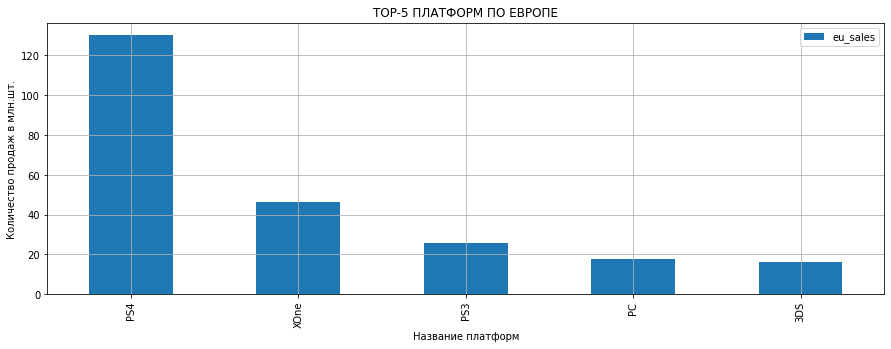

In [88]:
# df.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending = False).head(5) \
# .plot(column = 'platform',y = 'eu_sales',kind = 'bar',grid = True, figsize = (15,5), title = 'TOP-5 ПЛАТФОРМ ПО ЕВРОПЕ')
# plt.xlabel('Название платформ')
# plt.ylabel('Количество продаж в млн.шт.')

df.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending = False).head(5) \
.plot(y = 'eu_sales',kind = 'bar',grid = True, figsize = (15,5), title = 'TOP-5 ПЛАТФОРМ ПО ЕВРОПЕ')
plt.xlabel('Название платформ')
plt.ylabel('Количество продаж в млн.шт.')


## TOP -5 the most popular platforms JP

In [89]:
df.pivot_table(index='platform', values=['jp_sales'], aggfunc='sum').sort_values('jp_sales', ascending = False)

,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31
PSP,0.36
XOne,0.32
X360,0.08
PC,0.00


Text(0, 0.5, 'Количество продаж в млн.шт.')

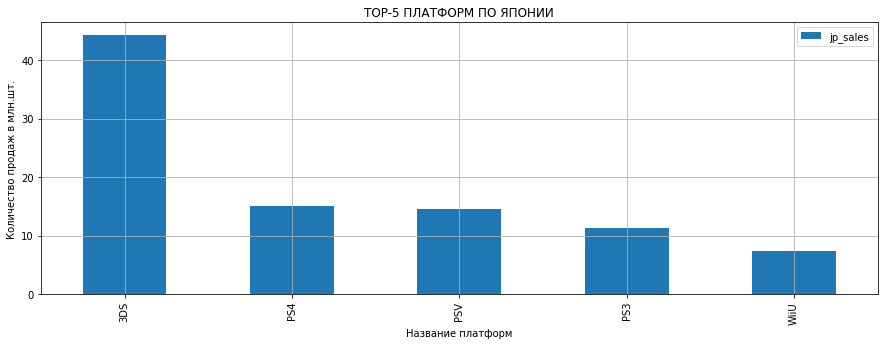

In [90]:
# df.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending = False).head(5) \
# .plot(column = 'platform',y = 'jp_sales',kind = 'bar',grid = True, figsize = (15,5), title = 'TOP-5 ПЛАТФОРМ ПО ЯПОНИИ')
# plt.xlabel('Название платформ')
# plt.ylabel('Количество продаж в млн.шт.')

df.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending = False).head(5) \
.plot(y = 'jp_sales',kind = 'bar',grid = True, figsize = (15,5), title = 'TOP-5 ПЛАТФОРМ ПО ЯПОНИИ')
plt.xlabel('Название платформ')
plt.ylabel('Количество продаж в млн.шт.')

In North America and Europe, users choose gaming industry giants \
as expected, Sony PS in various modifications and Xbox dominate, replacing each other in the top positions \
An interesting picture has emerged in the Japanese market, users do not want to wait to come back home to spend time playing their favorite game \
therefore, they prefer "pocket" consoles, with Sony PS taking the second position

## Distribution of games by genre

Text(0, 0.5, 'Кол-во проданных единиц')

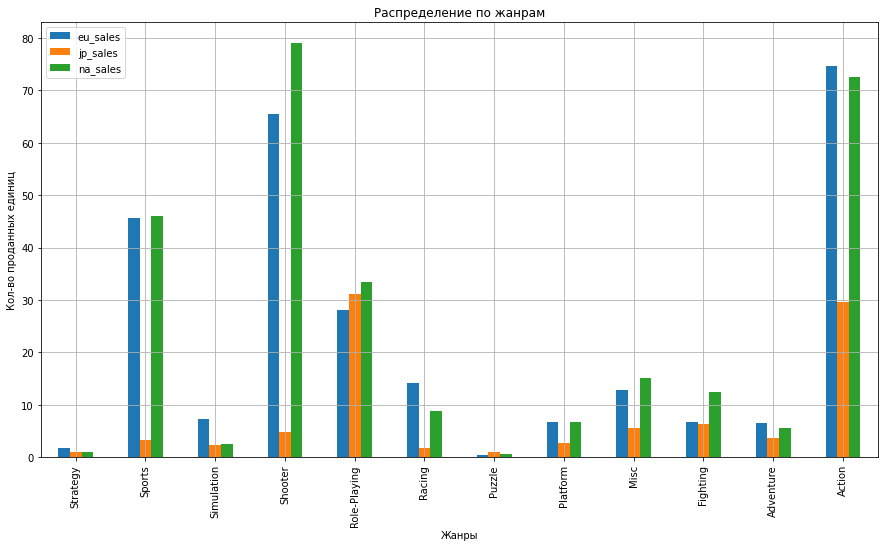

In [91]:
# df.pivot_table(index='genre', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum') \
# .sort_values('genre', ascending = False ) \
# .plot.bar(column = 'genre',grid = True, figsize = (15,8), title = 'Распределение по жанрам')
# plt.xlabel('Жанры')
# plt.ylabel('Кол-во проданных единиц')

df.pivot_table(index='genre', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum') \
.sort_values('genre', ascending = False ) \
.plot.bar(grid = True, figsize = (15,8), title = 'Распределение по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Кол-во проданных единиц')

Let's separate Europe and North America. Together, they make up a large part of the sales market. 
In America, the preferred genres are Shooter, Action, Sports. 
In Europe, the preferred genres are Action, Shooter, Sports.
The leading genre in the Japanese market is Role-Playing, Action, Misc. 
There are genres that are not popular everywhere: Strategy, Puzzle, Adventure.

### Evaluate the impact of ESRB ratings on sales in a specific region
First, let's clarify what this rating is. According to Wikipedia, the Entertainment Software Rating Board (ESRB) is a non-governmental organization that primarily focuses on rating computer and video games and other entertainment software in the United States and Canada.

Based on the task, the specific region we are looking at is North America, Europe, and Japan.

- "EC" (Early childhood): Suitable for children aged 3 and up, no objectionable material.
!ESRB EC Rating

- "E" (Everyone): Content suitable for all ages, may contain minimal cartoon violence.
!ESRB E Rating

- "E10+" (Everyone 10 and older): Content may contain more cartoon, fantasy, or mild violence, mild language, or minimal suggestive themes.
!ESRB E10+ Rating

- "T" (Teen): Content may be suitable for ages 13 and older, may contain violence, suggestive themes, crude humor, minimal blood, simulated gambling, and/or infrequent use of strong language.
!ESRB T Rating

- "M" (Mature): Content may be suitable for persons ages 17 and older, may contain intense violence, blood and gore, sexual content, and/or strong language.
!ESRB M Rating

- "AO" (Adults Only 18+): Content suitable only for adults ages 18 and up, may include prolonged scenes of intense violence and/or graphic sexual content.
!ESRB AO Rating

- "RP" (Rating Pending): Product has been submitted to ESRB and is awaiting a rating.
!ESRB RP Rating

- "RP 17+" (Rating Pending 17+): Product has been submitted to ESRB and content is expected to be similar to an "M" rating.
!ESRB RP 17+ Rating

Let's then group the table by region and rating.

**ESRB in Europe**

In [92]:
df.groupby('rating')['eu_sales'].sum().sort_values(ascending = False) 

rating
M          93.44
UNKNOWN    58.95
E          58.06
T          34.07
E10+       26.16
Name: eu_sales, dtype: float64

Text(0.5, 0, 'Рейтинг')

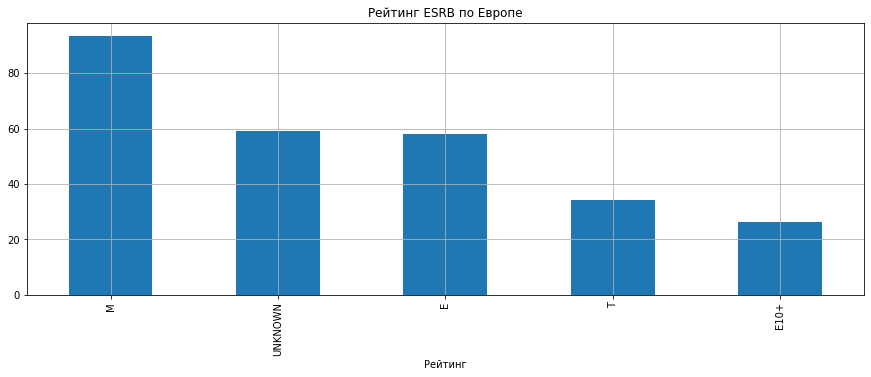

In [93]:
# df.groupby('rating')['eu_sales'].sum().sort_values(ascending = False) \
# .plot(column = 'rating',y = 'eu_sales',kind = 'bar',grid = True, figsize = (15,5), title = 'Рейтинг ESRB по Европе')
# plt.xlabel('Рейтинг')

df.groupby('rating')['eu_sales'].sum().sort_values(ascending = False) \
.plot(y = 'eu_sales',kind = 'bar',grid = True, figsize = (15,5), title = 'Рейтинг ESRB по Европе')
plt.xlabel('Рейтинг')

**ESRB in North America**

In [94]:
df.groupby('rating')['na_sales'].sum().sort_values(ascending = False) 

rating
M          96.42
UNKNOWN    64.72
E          50.74
T          38.95
E10+       33.23
Name: na_sales, dtype: float64

Text(0.5, 0, 'Рейтинг')

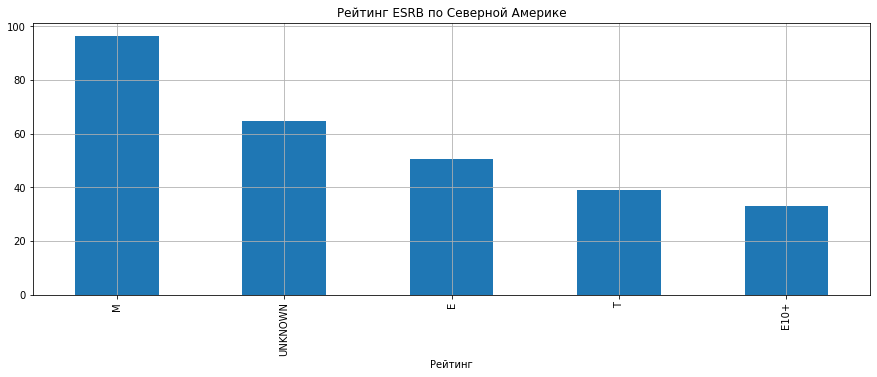

In [95]:
# df.groupby('rating')['na_sales'].sum().sort_values(ascending = False) \
# .plot(column = 'rating',y = 'na_sales',kind = 'bar',grid = True, figsize = (15,5), title = 'Рейтинг ESRB по Северной Америке')
# plt.xlabel('Рейтинг')

df.groupby('rating')['na_sales'].sum().sort_values(ascending = False) \
.plot(y = 'na_sales',kind = 'bar',grid = True, figsize = (15,5), title = 'Рейтинг ESRB по Северной Америке')
plt.xlabel('Рейтинг')

**ESRB in Japan**

In [96]:
df.groupby('rating')['jp_sales'].sum().sort_values(ascending = False) 

rating
UNKNOWN    56.90
T          14.78
E           8.94
M           8.01
E10+        4.46
Name: jp_sales, dtype: float64

Text(0.5, 0, 'Рейтинг')

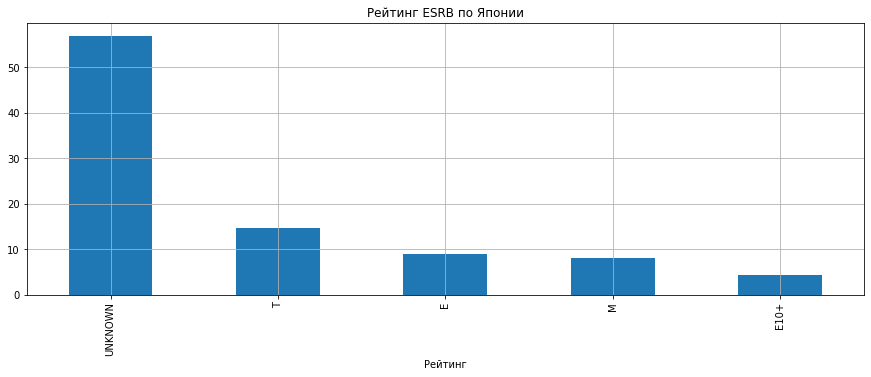

In [97]:
# df.groupby('rating')['jp_sales'].sum().sort_values(ascending = False) \
# .plot(column = 'rating',y = 'jp_sales',kind = 'bar',grid = True, figsize = (15,5), title = 'Рейтинг ESRB по Японии')
# plt.xlabel('Рейтинг')

df.groupby('rating')['jp_sales'].sum().sort_values(ascending = False) \
.plot(y = 'jp_sales',kind = 'bar',grid = True, figsize = (15,5), title = 'Рейтинг ESRB по Японии')
plt.xlabel('Рейтинг')

In North America and Europe, the ratings M and E are dominant. 
In Japan, the top rating is UNKNOWN (without rating), followed by E, and to a lesser extent materials for adults.

In [100]:
na = df.pivot_table(index='platform', values=['na_sales'], aggfunc='sum').nlargest(6,'na_sales') 
na
#.plot(kind='pie',y="na_sales", autopct='%1.0f%%', legend=False, title = "популярность платформ в Америке.", figsize=(5, 8))

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05
WiiU,19.36


In [101]:
eu = df.pivot_table(index='platform', values=['eu_sales'], aggfunc='sum').nlargest(6,'eu_sales') \
#.plot(kind='pie',y="eu_sales", autopct='%1.0f%%', legend=False, title = "популярность платформ в Европе.", figsize=(5, 8))
eu

,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12
X360,15.49


In [105]:
# check
# import pandas as pd
df_app = pd.DataFrame([['ps',1,2,3],
                   ['xone',3,5,6],
                   ['pc',8,9,10],
                   ['ps3',1,7,3],
                   ['ps4',5,2,3]], columns=['platform', 'eu','jp','na'])

# создал выборку из 4-х колонок и 5-ти строчек ⬆

display(df_app)

# вывел на экран ⬆

df_other = df_app[3:]

# создал новую выборку df_other с последними двумя строчками из выборки df_app, применил упрощенную версию кода
# можно при помощи iloc[3:], результат будет одинаковый, пример добавил

df_other = df_other.append({'platform': 'Other', 'eu': df_app['eu'].sum()-df_app['eu'][3:].sum(),
                  'jp': df_app['jp'].sum()-df_app['jp'][3:].sum(),
                  'na': df_app['na'].sum()-df_app['na'][3:].sum()}, ignore_index = True)

# здесь чуть сложнее
# к новой выборке df_other мы должны прибавить строку с суммой трех первых строк, которые не вошли в выборку df_app
# для этого я создаю словарь в котором прописываю все названия колонок, 
# и записываю значения разности между 5-ю строчками из первой, полной выборки и суммой двух строк из второй выборки 
# в новую строку, в новую выборку

# здесь нет новых, экстраординарных сведений, 
# большая часть кода связана с пониманием базовых конструкций для работы с данными: loc и iloc


df_other

,platform,eu,jp,na
0,ps,1,2,3
1,xone,3,5,6
2,pc,8,9,10
3,ps3,1,7,3
4,ps4,5,2,3


,platform,eu,jp,na
0,ps3,1,7,3
1,ps4,5,2,3
2,Other,12,16,19


In [106]:
# check

df.groupby('platform').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False)

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05
WiiU,19.36
PC,7.23
PSV,2.52
Wii,2.08


### Hypothesis Testing
We will test the following hypotheses:

1. The average user ratings for Xbox One and PC platforms are the same.
2. The average user ratings for Action and Sports genres are different.

Let's define the hypotheses:

### Average Platform Ratings
H0 - the average ratings are the same  
H1 - the average ratings are different

### User Ratings for Genres
H0 - the average user ratings are the same  
H1 - the average user ratings are different

In [107]:
raiting_xbox = df[df['platform'] == 'XOne']
raiting_pc = df[df['platform'] == 'PC']
raiting_xbox[raiting_xbox['year_of_release'] >=2010]
#raiting_pc

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
99,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,UNKNOWN,7.39
165,Grand Theft Auto V,XOne,2014.0,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014.0,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015.0,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015.0,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
...,...,...,...,...,...,...,...,...,...,...,...,...
16630,Sébastien Loeb Rally Evo,XOne,2016.0,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01
16643,Rugby Challenge 3,XOne,2016.0,Sports,0.00,0.01,0.00,0.00,NaN,6.6,E,0.01
16645,ZombiU,XOne,2016.0,Action,0.00,0.01,0.00,0.00,NaN,NaN,UNKNOWN,0.01
16660,Prison Architect,XOne,2016.0,Action,0.01,0.00,0.00,0.00,74.0,6.7,UNKNOWN,0.01


In [108]:
#соберем dataframe без пропуска в столбце user_score это поможет нам не получить р-значение nan
df_df = df[df['user_score'] >= 0]
display(df_df['user_score'])
df_df

42       8.3
77       4.3
92       5.7
94       5.0
105      6.5
        ... 
16630    8.2
16643    6.6
16652    8.5
16660    6.7
16692    7.6
Name: user_score, Length: 888, dtype: float64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016.0,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015.0,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
...,...,...,...,...,...,...,...,...,...,...,...,...
16630,Sébastien Loeb Rally Evo,XOne,2016.0,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01
16643,Rugby Challenge 3,XOne,2016.0,Sports,0.00,0.01,0.00,0.00,NaN,6.6,E,0.01
16652,Fast Racing Neo,WiiU,2016.0,Action,0.00,0.01,0.00,0.00,81.0,8.5,E,0.01
16660,Prison Architect,XOne,2016.0,Action,0.01,0.00,0.00,0.00,74.0,6.7,UNKNOWN,0.01


In [109]:
df['platform'].isna().sum()

0

In [110]:
raiting_xbox = df_df[df_df['platform'] == 'XOne']
raiting_pc = df_df[df_df['platform'] == 'PC']
user_score_xbox = raiting_xbox['user_score']
user_score_pc = raiting_pc['user_score']
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(user_score_xbox, user_score_pc)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 


p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


In [112]:
rating_genre_action = df_df[df_df['genre'] == 'Action']
rating_genre_sports = df_df[df_df['genre'] == 'Sports']
user_score_action = rating_genre_action['user_score']
user_score_sports = rating_genre_sports['user_score']
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(user_score_action, user_score_sports)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 


p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


In the first case, the data do not contradict the null hypothesis. The average user ratings for Xbox One and PC platforms are the same.

In the second case, the data contradict the null hypothesis, thus the average user ratings for Action and Sports genres are different.

### Overall Conclusion
In this project, we analyzed the gaming genres and platforms of the "Stream" store. The current dataset had 16,715 records and 11 columns. Some columns contained over 40% missing values. We changed the data types of some columns. In the project, we familiarized ourselves with concepts such as TBD and ESRB. We found outdated data prior to 2014. We determined that PS4 and Xbox One are the best-selling platforms, with PS4 being the most profitable. We found that PS4 and Xbox are popular in the European and North American regions, while the Japanese market prefers handheld devices. Europe and North America make up a large part of the sales market. We found that in these markets, the genres Action, Sports, and Shooter have similar sales, while in the Japanese market Role-Playing, Action, and Misc genres are leading. There are genres that are not popular everywhere, such as Strategy, Puzzle, and Adventure. We determined the impact of the ESRB rating on sales. In North America and Europe, M and E ratings predominate, while in Japan, the UNKNOWN rating is leading, followed by E, and to a lesser extent, Adults Only. The importance of critics is not significant except in cases of strong criticism, in which it does not affect sales. The importance of rating is crucial for European and American users, where it should be without violence or with moderate violence. In contrast, the rating does not have a significant impact on sales for Japanese buyers. We tested hypotheses and concluded that the average user ratings for Xbox One and PS platforms are the same, while the average user ratings for Action and Sports genres are different.

## Bonus

In [113]:
data_games = pd.read_csv('/datasets/games.csv')

In [114]:
data_games.columns = map(str.lower, data_games.columns)

In [115]:
data_games = data_games.dropna(subset = ['year_of_release', 'name', 'genre'])

In [116]:
data_games['user_score'] = data_games['user_score'].replace('tbd', np.nan).astype('float')

In [117]:
data_games['rating'] = data_games['rating'].fillna('unknown')

In [118]:
data_games['total_sales'] = data_games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [119]:
# check
# круги + категория другие
def graph (df, year, region, name, axes):
    
    df = df.query('year_of_release >= @year')
    
    sales = df.pivot_table(index='platform', 
                           values=region, 
                           aggfunc='sum').nlargest(5, region)
    
    sales = sales.reset_index()
    
    sales = (
            sales.append({'platform': 'Other', region: df[region].sum() 
                       - sales[region].sum()}, ignore_index= True)
         )
    
    
    sales.columns = ['platform', 'sales']
      
    labels_c=sales.platform
    colours = {'Wii':'C0', 'NES':'C1', 'GB':'C2', 'DS':'C3', 'X360':'C4', 
    'PS3':'C5', 'PS2':'C6', 'SNES':'C7', 'GBA':'C8',
               'PS4':'steelblue', '3DS':'orange', 
               'N64':'C11', 'PS':'C12', 'XB':'C13', 'PC':'C14', '2600':'C15', 'PSP':'C16', 
               'XOne':'C17',
               'WiiU':'C18', 'GC':'C19', 'GEN':'C20', 'DC':'C21', 'PSV':'C22', 
               'SAT':'C23', 'SCD':'C24', 'WS':'C25', 'NG':'C26', 
               'TG16':'C27', '3DO':'C28', 'GG':'C29', 'PCFX':'C30', 'Other':'darkred'}
   
    sales.plot(kind='pie',
               y="sales",
               
               autopct='%1.0f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'}, 
               labels= labels_c,
               colors=[colours[key] for key in labels_c],
               legend=False, 
               title = f"Популярность платформ в {name} ", 
               ax = axes).set(ylabel='')
    
    plt.tight_layout()

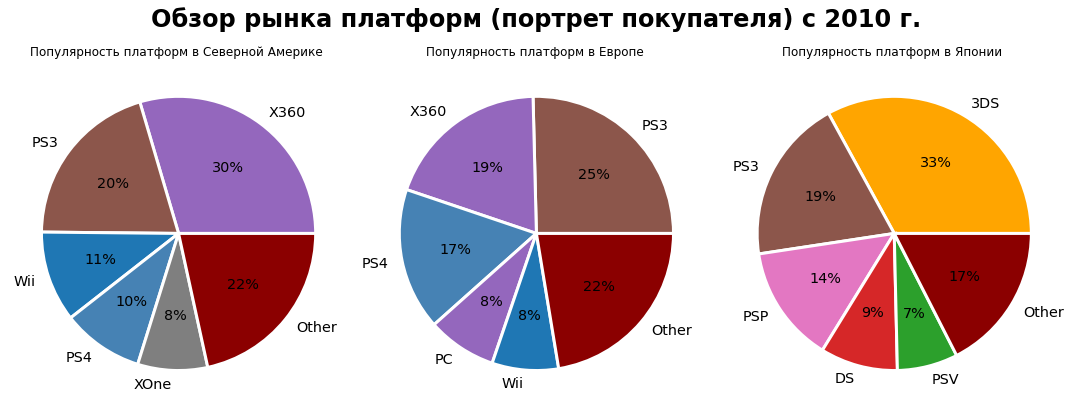

In [120]:
# check
# круги в ряд

x_year = 2010

fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle(f'Обзор рынка платформ (портрет покупателя) с {x_year} г.', fontsize = 24, fontweight='bold')

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])

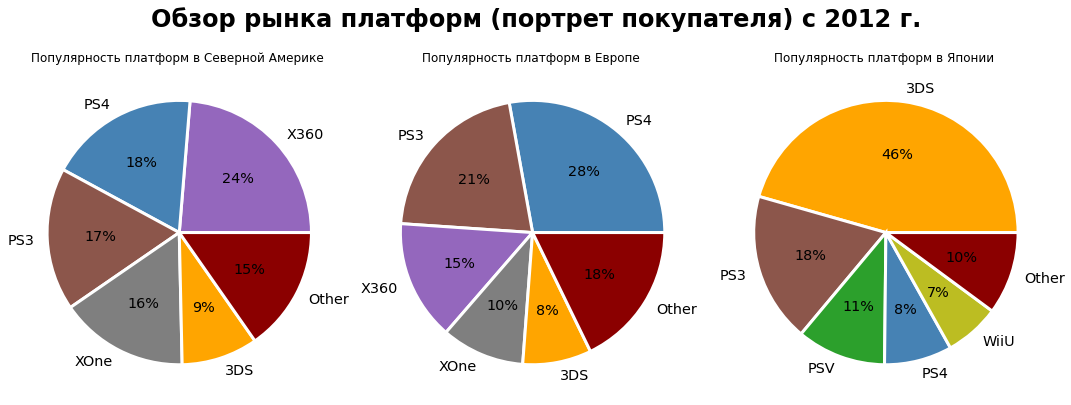

In [121]:
# check
# круги в ряд

x_year = 2012

fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle(f'Обзор рынка платформ (портрет покупателя) с {x_year} г.', fontsize = 24, fontweight='bold')

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])

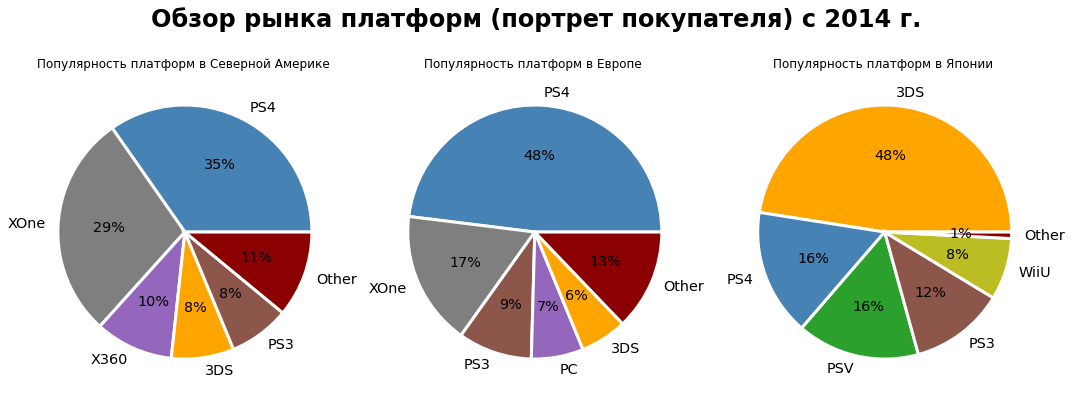

In [122]:
# check
# круги в ряд

x_year = 2014

fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle(f'Обзор рынка платформ (портрет покупателя) с {x_year} г.', fontsize = 24, fontweight='bold')

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])

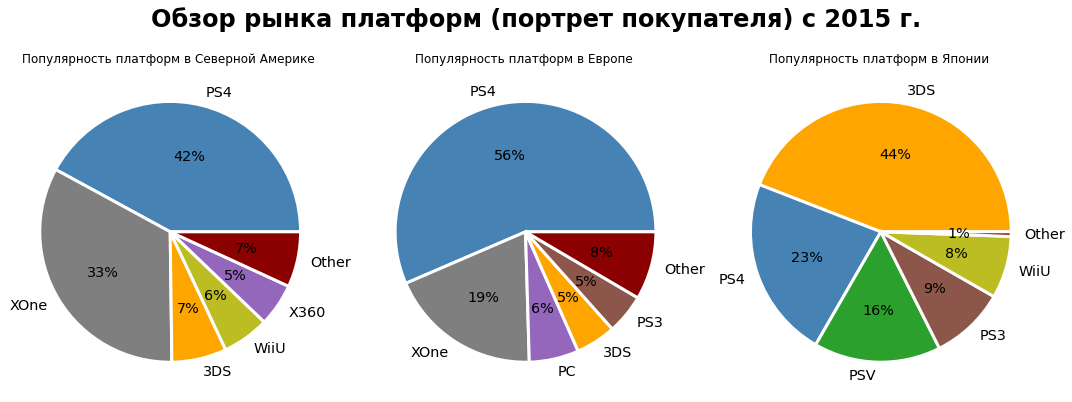

In [123]:
# check
# круги в ряд

x_year = 2015

fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle(f'Обзор рынка платформ (портрет покупателя) с {x_year} г.', fontsize = 24, fontweight='bold')

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])